In [19]:
%matplotlib inline
import pandas as pd
import numpy as np

census = pd.read_csv('../acs2015_county_data.csv')
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


### K-means

In [2]:
census.isnull().sum(axis = 0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [3]:
census_missing = census.dropna()

In [4]:
census_columns = [col for col in census.columns.values if col not in ['CensusId', 'State', 'County']]

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

In [6]:
census_clusters = kmeans.fit(census_missing[census_columns])
census_clusters.cluster_centers_

array([[4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
        7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
        6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
        2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
        3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
        1.60345066e+01, 7.94196711e+01, 1.03449342e+01, 6.61085526e-01,
        3.34588816e+00, 1.59351974e+00, 4.63578947e+00, 2.30830263e+01,
        2.15065523e+04, 7.38485197e+01, 1.77832895e+01, 8.07098684e+00,
        2.97006579e-01, 8.08003289e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [9]:
census_missing['Cluster'] = census_clusters.fit_predict(census_missing[census_columns])

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
census_missing.Cluster.value_counts()

0    3045
2     153
1      19
3       1
Name: Cluster, dtype: int64

In [11]:
census_missing[census_missing.Cluster == 0].State.value_counts()

Texas             241
Georgia           155
Virginia          130
Kentucky          119
Missouri          113
Kansas            103
Iowa               98
Illinois           97
North Carolina     97
Tennessee          92
Nebraska           92
Indiana            90
Minnesota          84
Ohio               82
Mississippi        82
Michigan           78
Puerto Rico        78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          62
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
Florida            53
North Dakota       53
New York           51
South Carolina     44
Idaho              43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [12]:
census_missing[census_missing.Cluster == 1].State.value_counts()

California    5
Texas         4
New York      3
Florida       2
Illinois      1
Michigan      1
Washington    1
Nevada        1
Arizona       1
Name: State, dtype: int64

In [13]:
census_missing[census_missing.Cluster == 2].State.value_counts()

California              15
Florida                 12
New Jersey              11
Pennsylvania             9
New York                 8
Massachusetts            8
Texas                    8
Ohio                     6
Colorado                 5
Maryland                 5
Illinois                 4
Georgia                  4
Washington               4
Michigan                 4
Minnesota                3
Wisconsin                3
North Carolina           3
Tennessee                3
Virginia                 3
Oregon                   3
Connecticut              3
Indiana                  2
Kansas                   2
Missouri                 2
Alabama                  2
Oklahoma                 2
Louisiana                2
Utah                     2
South Carolina           2
Nevada                   1
Arkansas                 1
Nebraska                 1
Iowa                     1
New Mexico               1
Kentucky                 1
New Hampshire            1
Delaware                 1
D

In [14]:
census_missing[census_missing.Cluster == 3].State.value_counts()

California    1
Name: State, dtype: int64

In [15]:
census_missing.groupby(['Cluster'])['Income'].mean()

Cluster
0    45264.092282
1    58589.894737
2    61615.901961
3    56196.000000
Name: Income, dtype: float64

In [16]:
census_missing.groupby(['Cluster'])['ChildPoverty'].mean()

Cluster
0    24.418030
1    23.584211
2    19.681046
3    25.800000
Name: ChildPoverty, dtype: float64

### Hierarchical Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

census_sample = census_missing[census_columns].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(census_sample)

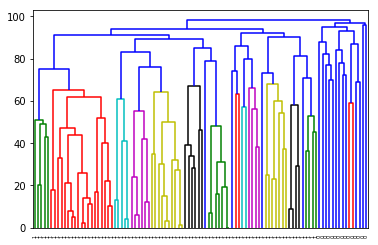

In [24]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(census_hier, labels=census_hier.labels_)